In [62]:
%matplotlib inline

user-defined LaTeX commands
$\newcommand{\Er}{\mathcal{E}}$
$\newcommand{\Xset}{\mathcal{X}}$
$\newcommand{\Yset}{\mathcal{Y}}$
$\newcommand{\L}{\mathcal{L}}$
$\newcommand{\l}{\mathcal{l}}$
$\newcommand{\pr}{\mathbb{P}}$
$\newcommand{\E}{\mathbb{E}}$
$\newcommand{\D}{\mathbb{D}}$
$\newcommand{\w}{\mathbf{w}}$
$\newcommand{\X}{\mathbf{X}}$
$\newcommand{\y}{\mathbf{y}}$
$\newcommand{\x}{\mathbf{x}}$
$\newcommand{\J}{\mathbf{J}}$
$\newcommand{\I}{\mathbf{I}}$
$\newcommand{\X}{\mathbf{X}}$
$\newcommand{\S}{\mathbf{S}}$
$\newcommand{\e}{\mathbf{e}}$
$\newcommand{\C}{\mathbf{C}}$
$\newcommand{\K}{\mathbf{K}}$
$\newcommand{\R}{\mathbf{R}}$
$\newcommand{\v}{\mathbf{v}}$
$\newcommand{\phivec}{\boldsymbol{\phi}}$
$\newcommand{\sign}{\mathrm{sign}}$
$\newcommand{\z}{\mathbf{z}}$

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
from matplotlib import colors, ticker, cm

In [65]:
from ggplot import *

In [66]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [67]:
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import bernoulli
from scipy.stats import multivariate_normal

In [68]:
from matplotlib.colors import ListedColormap
import warnings

In [69]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.xlim(xx2.min(), xx2.max())
    # plot samples
    X_test, y_test = X[test_idx,:], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker='o', label=cl)
    # test samples highlight
    if test_idx.any():
        X_test, y_test = X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c=cmap(y_test), alpha=0.5, linewidth=1, marker='o', s=55, label='Test set')
    plt.legend()

### Toy data for classification task

In [137]:
X, y = make_moons(noise=0.1, n_samples=1000)

In [70]:
# add simulation for toy example
import math
n = 1000
xi1 = np.random.normal(1, 1, (n, 2))
xi2 = np.random.normal(10, 5, (n, 2))
y1 = [0] * n
y2 = [1] * n
X = np.vstack((xi1, xi2))
y = np.hstack((y1, y2))

In [138]:
X = scale(X)

In [139]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [140]:
y_ind = np.array([(i, yi) for i, yi in enumerate(y)])

In [141]:
X_train, X_test, y1, y2 = train_test_split(X, y_ind, test_size=0.25)

In [142]:
train_idx, test_idx = y1.T[0], y2.T[0]

In [143]:
y_train, y_test = y1.T[1], y2.T[1]

In [144]:
dat = {'x': X_train.T[0], 'y': X_train.T[1], 'variable': y_train}
dat = pd.DataFrame(dat)
dat['color']=['red' if variable == 0 else 'blue' for variable in dat['variable']]

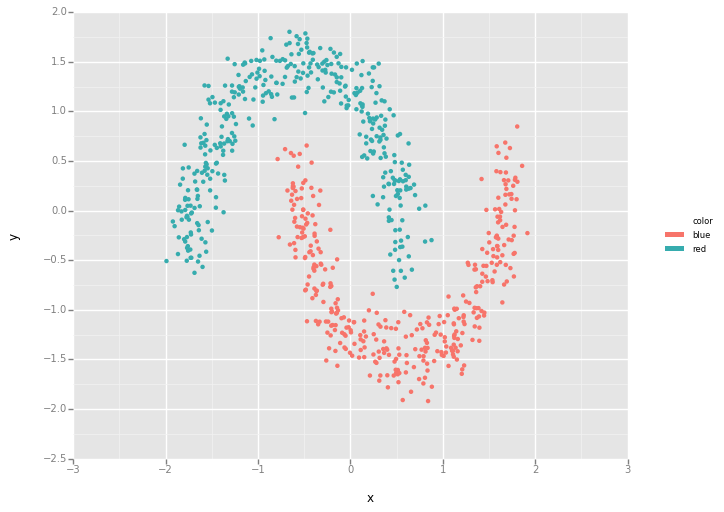

<ggplot: (293504015)>

In [145]:
ggplot(aes(x='x', y='y', group='variable',color='color'),dat) + geom_point()

### Linear classifier
* Consider a linear relation: $y = b + \sum_iw_ix_i$, where $b$ stands for *bias* or *interception*, $x$ - are data points (observations). 
* We can rewrite it in a simpler matrix form including bias into coefficients vector:
$\mathbf{x} = (1,x_1,\ldots,x_m)$ , $\mathbf{w} = (b,w_1,\ldots,w_m)$ and getting as a result:
$y=\mathbf{w}^T\mathbf{x}$. 
* Suppose you are going to offer some rule, according to which if $y(n)=\mathbf{w}(n)^T\mathbf{x}(n)>0$ you'll mark data point $(x_1,\ldots,x_m)$ as belonging to a class $\mathcal{C}_1$ and $\mathcal{C}_2$ otherwise.

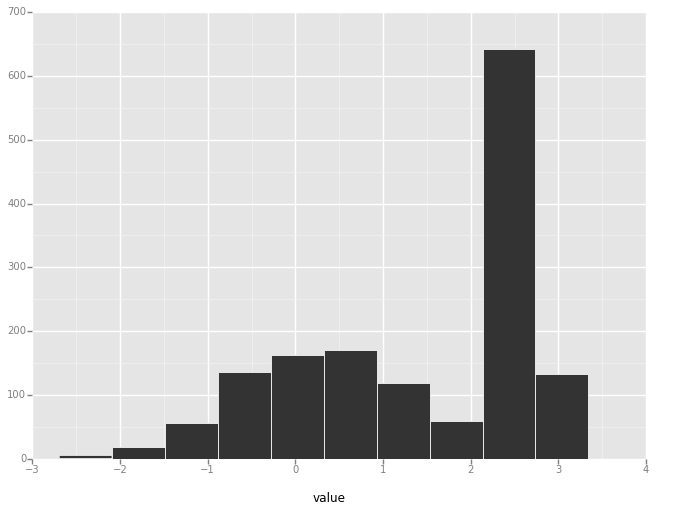

<ggplot: (294095778)>

In [79]:
# define the dimension of data point
n_features = X_train.shape[1]
# number of observations in train set
n_samples = X_train.shape[0]
# take some random values as a first guess for linear classifier coefficients
w = norm.rvs(size=n_features + 1)
# add column of ones to observations matrix
IX = np.hstack((np.ones(n_samples).reshape(-1,1),X_train))
# calculate linear combination
z = np.dot(IX,w)
dat = pd.DataFrame(z,columns=['value'])
ggplot(aes(x='value'),data=dat)+geom_histogram()

**Linear activation function**

$\displaystyle{\mathbf{z}=\mathbf{w}^T\mathbf{x}}$, where $\mathbf{x}=(1,x)=(1,x_1,\ldots,x_m)$

**Quantizer functions**

Define the *step function*:
$d(z)=\left\{\begin{array}{ll}
1, && z \geq \delta\\
0, && z < \delta
\end{array}
\right.
$,
where $\delta$ stands for threshold (or margin), output is the predicted class.

*Signum function*:
$\sign(z)=\left\{\begin{array}{ll}
1, && z > 0\\
-1, && z < 0
\end{array}
\right.
$

Let's implement them in one function.

In [80]:
def step_function(x, margin = 0, label=[0,1]):
    return np.where(x >= margin, label[1], label[0])

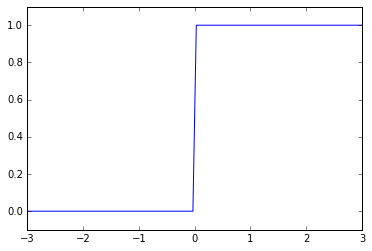

In [81]:
x = np.linspace(-3,3,100)
plt.plot(x, step_function(x))
plt.ylim([-0.1,1.1]);

** Model output**

$\displaystyle{\hat{y}=d(\mathbf{w}^T\mathbf{x})}$

**Error signal**

Is the difference between desired output $y$ and model output $\hat{y}$: $e=y-\hat{y}$

**Classification rule**

Classification is correct, if $\displaystyle{y\w^T\x>0}$

**0/1 Loss function: first attempt to define cost function**

$\displaystyle{J_{0/1}(\w)=\frac{1}{n}\sum_{i=1}^n\I\left(\sign(\w^T\x_i)\neq y_i\right)}$
is a bad variant due to gradient.

**Perceptron cost function**

$\displaystyle{J(\w)=\frac{1}{n}\sum_{i=1}^n\max(0,-y_i\w^T\x_i)}$

**Classifier score**

Proportion of correctly classified points:
$\displaystyle{\mathrm{score}=1-\frac{1}{n}\|\mathcal{X}_1\|}$, where $\mathcal{X}_1$ - set of points $x$ misclassified by a classifier with weight vector $\mathbf{w}$

In [82]:
class NaiveLinearClassifier(object):
    
    def __init__(self, loc = 0.0, scale = 1.0, seed = None):
        self.loc_ = loc
        self.scale_ = scale
        self.seed_ = seed
        
    def fit(self, X, y, weights = None):
        if self.seed_ is not None:
            np.random.seed(self.seed_)
        self.n_samples_ = X.shape[0]
        self.n_features_ = X.shape[1]
        if weights is None:
            self.weights_ = norm.rvs(loc=self.loc_, scale=self.scale_,size = self.n_features_ + 1)
        else:
            self.weights_ = weights
        quantized_output = self.predict(X)
        
        errors = y - quantized_output
        
        self.errors_ = np.absolute(errors).sum()
        self.cost_ = np.dot((errors != 0).astype(float), np.absolute(self.output_))
        
        return self
    
    def activation(self, X):
        n_samples = X.shape[0]
        IX = np.hstack((np.ones(n_samples).reshape(-1,1),X))
        self.output_ = np.dot(IX, self.weights_)
        return self.output_
    
    def predict(self, X):
        return step_function(self.activation(X))
    
    def score(self, X, y):
        return (self.predict(X)==y).astype(float).sum()/len(y)
    
    def cost(self):
        return self.cost_

In [85]:
nlc = NaiveLinearClassifier()
nlc.fit(X_train, y_train)
print('Train score %.3f, Test score %.3f'% (nlc.score(X_train, y_train),nlc.score(X_test, y_test)))

Train score 0.917, Test score 0.914


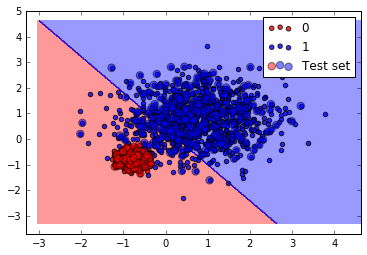

In [86]:
plot_decision_regions(X, y, nlc, test_idx)

### Try our naive classifier several times and track scores and costs

In [87]:
nlc = NaiveLinearClassifier()
scores = []
costs = []
for i in range(1000):
    nlc.fit(X_train, y_train)
    scores.append(nlc.score(X_train, y_train))
    costs.append(nlc.cost())
scores = np.array(scores)
costs = np.array(costs)

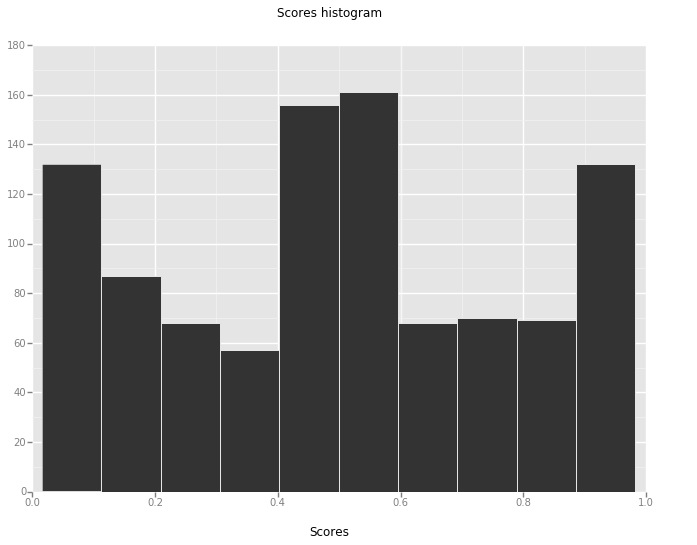

<ggplot: (293681549)>

In [88]:
dat = pd.DataFrame(scores,columns=['value'])
ggplot(aes(x='value'),data=dat)+geom_histogram()+labs(x='Scores', title='Scores histogram')

### Let's improve our classifier: Rosenblatt's Perceptron
* Define **cost function** $J(w)$ and use method of *gradient descent* to find $w$, providing the minimum for cost function. 
* Method of gradient desecent gives a sequense $w\leftarrow w-\eta\nabla J_i(w)$, for $i=1,\ldots,n$, converges to a local minima of $J(w)$ 

**Alogorithm for Rosenblatt's Perceptron**

* Start with random weights;
* Incrementally update weights such that points that are misclassified move closer to the correct side of the boundary between classes.

**Learning rule: optimization interpretation**

* Define cost function  $\displaystyle{J(\w)=\frac{1}{n}\sum_{i=1}^n\max(0,-y_i\w^T\x_i)}$.
* Let $\eta$ be a learning rate
* then the learning rule is: $\displaystyle{\mathbf{w} \leftarrow \mathbf{w}+\eta y\mathbf{x}}$ for $\x\in\mathcal{X}_1$

**Learning rule explanation**

Explanation via gradient descent:

$\displaystyle{\frac{\partial J(\w)}{\partial\w}=\left\{\begin{array}{ll}
0, && y\w^T\x > 0\\
-y\x, && y\w^T\x \leq 0
\end{array}
\right.
}$

In [89]:
@np.vectorize
def J(w0, w1, w2):
    w = np.zeros(3)
    w[0] = w0
    w[1] = w1
    w[2] = w2
    return nlc.fit(X_train, y_train, w).cost()

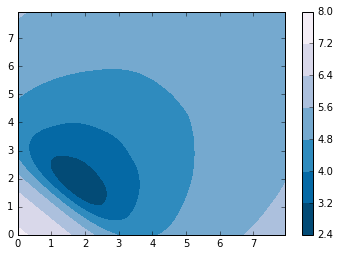

In [90]:
delta = 0.05
w0 = 2.
w1 = np.arange(0.0, 8.0, delta)
w2 = np.arange(0.0, 8.0, delta)
W1, W2 = np.meshgrid(w1, w2)
Z = J(w0, W1, W2)
fig, ax = plt.subplots()
cs = ax.contourf(W1, W2, np.log(Z), cmap=cm.PuBu_r)
cbar = fig.colorbar(cs)
plt.show()

In [91]:
class Perceptron(object):
    
    def __init__(self, learning_rate = 0.01, epochs = 10, shuffle=True):
        self.rate_ = learning_rate
        self.epochs_ = epochs
        self.shuffle_ = shuffle 
        
    def fit(self, X, y):
        self.n_samples_ = X.shape[0]
        self.n_features_ = X.shape[1]
        # initialize weights
        self.weights_ = norm.rvs(size = self.n_features_ + 1)
        self.cost_ = []
        self.errors_ = []
        for i in range(self.epochs_):
            if self.shuffle_:
                X, y = self.shuffle(X, y)
            cost = []
            error = []
            for Xi, yi in zip(X, y):
                errors = yi - self.predict(Xi)
                
                cost.append(np.dot((errors != 0).astype(float), np.absolute(self.output_)))
                error.append(np.absolute(errors).sum())
                
                update = self.rate_*errors
                self.weights_[0] += update.sum()
                self.weights_[1:] += np.dot(update, Xi)
                
            self.cost_.append(np.mean(cost))
            self.errors_.append(np.mean(error))
        self.cost_ = np.array(self.cost_)
        self.errors_ = np.array(self.errors_)
        return self
    
    def shuffle(self, X, y):
        i = np.random.permutation(len(y))
        return X[i], y[i]
    
    def activation(self, X):
        self.output_ = np.dot(X, self.weights_[1:]) + self.weights_[0]
        return self.output_
    
    def predict(self, X):
        return step_function(self.activation(X))
    
    def score(self, X, y):
        return (self.predict(X)==y).astype(float).sum()/len(y)
    
    def cost(self):
        return self.cost_[self.epochs_-1]

In [92]:
ppn = Perceptron(0.001, 10)
ppn.fit(X_train, y_train)
print('Train score %.3f, Test score %.3f'% (ppn.score(X_train, y_train),ppn.score(X_test, y_test)))

Train score 0.973, Test score 0.964


In [93]:
ppn.weights_

array([ 0.24720527,  0.27561133,  0.17066497])

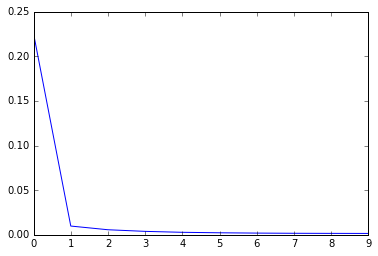

In [94]:
plt.plot(ppn.cost_)
plt.show()

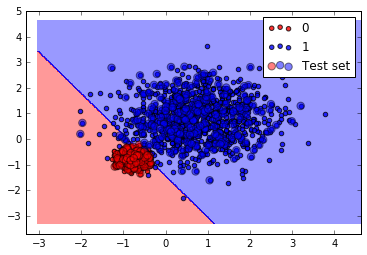

In [95]:
plot_decision_regions(X, y, ppn, test_idx)

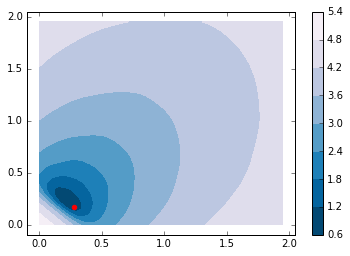

In [96]:
delta = 0.05
w0 = ppn.weights_[0]
w1 = np.arange(0.0, 2.0, delta)
w2 = np.arange(0.0, 2.0, delta)
W1, W2 = np.meshgrid(w1, w2)
Z = J(w0, W1, W2)
fig, ax = plt.subplots()
cs = ax.contourf(W1, W2, np.log(Z), cmap=cm.PuBu_r)
cbar = fig.colorbar(cs)
plt.scatter(ppn.weights_[1], ppn.weights_[2], color='red')
plt.show()

### Adaptive Linear Neuron: Batch learning

* Define **cost function** $J(w)$ and use method of *gradient descent* to find $w$, providing the minimum for cost function. 
* Method of gradient desecent gives a sequense $w(n+1)=w(n)-\eta\nabla J(w(n)$, converges to a local minima of $J(w)$ 

**Quadratic loss cost function**

$\displaystyle{J(w) = \frac{1}{2}\sum_{k}e_k^2}$

**Learning rule**

* Let $\eta$ be a learning rate
* then the learning rule is: $\displaystyle{\mathbf{w} \leftarrow \mathbf{w}+\eta e\mathbf{x}}$

**Learning rule explanation**

Explanation via gradient descent:

$\displaystyle{\frac{\partial J(\w)}{\partial \w}=\frac{1}{2}\frac{\partial (\hat{y}-y)^2}{\partial \w}=(\hat{y}-y)\frac{\partial \hat{y}}{\partial\w}=e\frac{\partial\w\cdot\x}{\partial\w}=e\x}$

In [97]:
class Adaline(object):
    
    def __init__(self, learning_rate = 0.01, epochs = 10):
        self.rate_ = learning_rate
        self.epochs_ = epochs
        
    def fit(self, X, y):
        self.n_samples_ = X.shape[0]
        self.n_features_ = X.shape[1]
        # initialize weights
        self.weights_ = norm.rvs(size = self.n_features_ + 1)
        self.errors_= []
        self.cost_ = []
        for i in range(self.epochs_):
            errors = y - self.predict(X)
            residuals = y - self.activation(X)
            
            self.errors_.append(np.absolute(errors).sum())
            self.cost_.append((residuals**2).sum()/2.)
            
            update = self.rate_*errors
            self.weights_[0] += update.sum()
            self.weights_[1:] += np.dot(update, X)
        
        self.errors_ = np.array(self.errors_)
        self.cost_ = np.array(self.cost_)
        return self
    
    def activation(self, X):
        n_samples = X.shape[0]
        IX = np.hstack((np.ones(n_samples).reshape(-1,1),X))
        self.output_ = np.dot(IX, self.weights_)
        return self.output_
    
    def predict(self, X):
        return step_function(self.activation(X), 0.5)
    
    def score(self, X, y):
        return (self.predict(X)==y).astype(float).sum()/len(y)
    
    def cost(self):
        return self.cost_[self.epochs_-1]

In [107]:
ppn = Adaline(10.1, 1000)
ppn.fit(X_train, y_train)
print('Train score %.3f, Test score %.3f'% (ppn.score(X_train, y_train),ppn.score(X_test, y_test)))

Train score 0.967, Test score 0.968


In [108]:
ppn.weights_

array([  403.92687736,  1156.48110148,  1120.54288309])

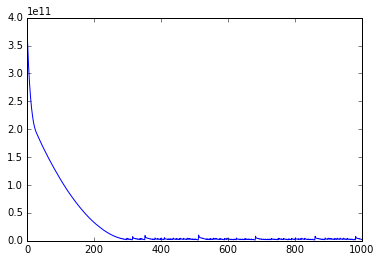

In [109]:
plt.plot(ppn.cost_)
plt.show()

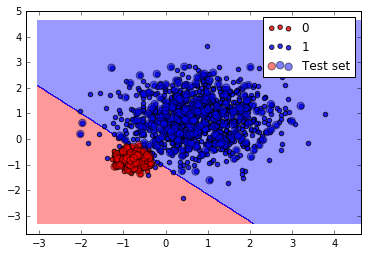

In [101]:
plot_decision_regions(X, y, ppn, test_idx)

### Stochastic Gradient Descent

Stochastic Gradient Descent is an online version of batch gradient descent, implemented earlier.

**Stochastic Gradient Descent: update weights after observing each example.**

* Randomly shuffle training examples;
* Apply learning rule: $w\leftarrow w-\eta\nabla J_i(w)$ for $i=1,\ldots,n$

**Pay attention to the step function margin!**

In [110]:
class SGDAdaline(object):
    
    def __init__(self, learning_rate = 0.01, epochs = 10, shuffle=True):
        self.rate_ = learning_rate
        self.epochs_ = epochs
        self.shuffle_ = shuffle 
        
    def fit(self, X, y):
        self.n_samples_ = X.shape[0]
        self.n_features_ = X.shape[1]
        # initialize weights
        self.weights_ = norm.rvs(size = self.n_features_ + 1)
        self.cost_ = []
        self.errors_ = []
        self.w_ = []
        for i in range(self.epochs_):
            if self.shuffle_:
                X, y = self.shuffle(X, y)
            cost = []
            error = []
            for Xi, yi in zip(X, y):
                errors = yi - self.predict(Xi)
                residuals = yi - self.activation(Xi)
                
                cost.append((residuals**2).sum()/2.)
                error.append(np.absolute(errors).sum())
                update = self.rate_*residuals
                
                self.weights_[0] += update.sum()
                self.weights_[1:] += np.dot(update, Xi)
            self.cost_.append(np.mean(cost))
            self.errors_.append(np.mean(error))
        self.cost_ = np.array(self.cost_)
        self.errors_ = np.array(self.errors_)
        return self
    
    def shuffle(self, X, y):
        i = np.random.permutation(len(y))
        return X[i], y[i]
    
    def activation(self, X):
        self.output_ = np.dot(X, self.weights_[1:]) + self.weights_[0]
        return self.output_
    
    def predict(self, X):
        return step_function(self.activation(X), 0.5)
    
    def score(self, X, y):
        return (self.predict(X)==y).astype(float).sum()/len(y)
    
    def cost(self):
        return self.cost_[self.epochs_-1]

In [114]:
ppn = SGDAdaline(0.001, 20, True)
ppn.fit(X_train, y_train)
print('Train score %.3f, Test score %.3f'% (ppn.score(X_train, y_train),ppn.score(X_test, y_test)))

Train score 0.945, Test score 0.952


In [115]:
ppn.weights_

array([ 0.49999312,  0.22657506,  0.24981611])

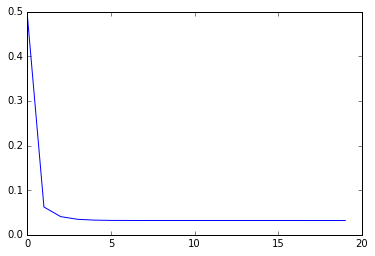

In [116]:
plt.plot(ppn.cost_)
plt.show()

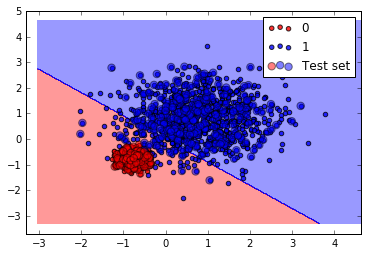

In [117]:
plot_decision_regions(X, y, ppn, test_idx)

### Adaline with sigmoid activation function

Define cost function as $J(w) = \frac{1}{2}\sum_k\left(y(k)-\varphi(\mathbf{w}^T\mathbf{x}_k)\right)^2$, 
where $\varphi(x) = \left(1+e^{-x}\right)^{-1}$ - sigmoid function

### Logistic (sigmoid) function:

* $\displaystyle{\varphi(x) = \left(1+e^{-x}\right)^{-1}}$
* $\displaystyle{\varphi(x) = \left(1+e^{-x}\right)^{-1}=\frac{e^x}{1+e^x}}$
* $\displaystyle{\frac{\mathrm{d}}{\mathrm{d}x}\varphi(x)=\varphi(x)(1-\varphi(x))}$

In [118]:
def sigmoid(x, slope = 1.0):
    return 1.0/(1.0 + np.exp(-slope*x))

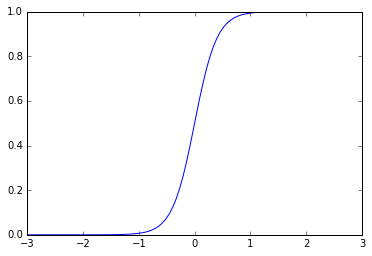

In [120]:
x = np.linspace(-3,3,100)
slope = 5.
plt.plot(x, sigmoid(x, slope));

**Sigmoid function derivative**

$\displaystyle{\varphi^{\prime}(x)=\varphi(x)(1-\varphi(x))}$

**Learning rule**

$\displaystyle{\frac{\partial J(\w)}{\partial \w}=\frac{1}{2}\frac{\partial (\hat{y}-y)^2}{\partial \w}=(\hat{y}-y)\frac{\partial \hat{y}}{\partial\w}=e\frac{\partial\varphi(\w\cdot\x)}{\partial\w}=e\varphi(\w\x)(1-\varphi(\w\x))\x}$

In [121]:
class SigmoidAdaline(object):
    
    def __init__(self, learning_rate = 0.01, epochs = 10):
        self.rate_ = learning_rate
        self.epochs_ = epochs
        
    def fit(self, X, y):
        self.n_samples_ = X.shape[0]
        self.n_features_ = X.shape[1]
        # initialize weights
        self.weights_ = np.zeros(self.n_features_ + 1)
        self.errors_= []
        self.cost_ = []
        for i in range(self.epochs_):
            errors = y - self.predict(X)
            self.errors_.append(np.absolute(errors).sum())
            
            residuals = y - self.activation(X)
            update = self.rate_*residuals*self.sigmoid_prime_
            self.weights_[0] += update.sum()
            self.weights_[1:] += np.dot(update, X)
            self.cost_.append((residuals**2).sum()/2.0)
        
        self.errors_ = np.array(self.errors_)
        self.cost_ = np.array(self.cost_)
        return self
    
    def activation(self, X):
        n_samples = X.shape[0]
        IX = np.hstack((np.ones(n_samples).reshape(-1,1),X))
        output = np.dot(IX, self.weights_)
        self.output_ = sigmoid(output)
        self.sigmoid_prime_ = self.output_*(1-self.output_)
        return self.output_
    
    def predict(self, X):
        return step_function(self.activation(X), 0.5)
    
    def score(self, X, y):
        return (self.predict(X)==y).astype(float).sum()/len(y)
    
    def cost(self):
        return self.cost_[self.epochs_-1]

In [122]:
ppn = SigmoidAdaline(0.001, 1000)
ppn.fit(X_train, y_train)
print('Train score %.3f, Test score %.3f'% (ppn.score(X_train, y_train),ppn.score(X_test, y_test)))

Train score 0.980, Test score 0.980


In [123]:
ppn.weights_

array([ 2.26483044,  3.04222257,  3.56036454])

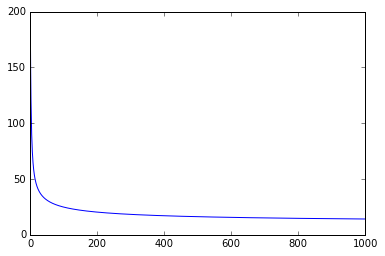

In [124]:
plt.plot(ppn.cost_)
plt.show()

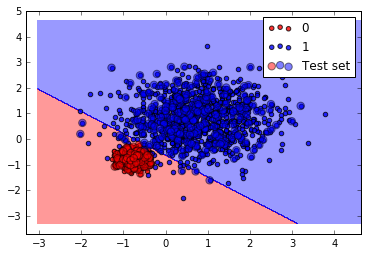

In [125]:
plot_decision_regions(X, y, ppn, test_idx)

### Probabilistic approach: Logistic Regression via Gradient Descent


* Define the probability $\displaystyle{\pr\left(y=1\thinspace\middle| \thinspace \x\right)=p(\x)}$
* Logistic regression $\displaystyle{p(\x)=\frac{e^{\w^T\x}}{1+e^{\w^T\x}}=\varphi(\w^T\x)}$
* In terms of *odds* $\displaystyle{\frac{p(\x)}{1-p(\x)}=e^{\w^T\x}}$
* In terms of *log-odds* $\displaystyle{\log\left(\frac{p(\x)}{1-p(\x)}\right)=\w^T\x}$

**Likelihood function**

* Define $\z=\w\x$

* Likelihood function: $\displaystyle{\L(\w)=\pr\left(y\thinspace\middle|\thinspace \x,\w \right)=\prod_{i=1}^n\varphi^{y_i}(\z_i)(1-\varphi(\z_i))^{1-y_i}}$
* Log-likelihood: $\displaystyle{\ell(\w)=\sum_{i=1}^ny_i\log\varphi(\z_i)+(1-y_i)\log(1-\varphi(\z_i))}$

**Cost function**

$J(w) = -\sum_{i=1}^ny_i\log\varphi(\z_i)+(1-y_i)\log(1-\varphi(\z_i))$

**Learning rule**

* Gradient: $\displaystyle{\frac{\partial }{\partial \w}\ell(\w)=\left(\frac{y}{\varphi(\z)}-\frac{1-y}{1-\varphi(\z)}\right)\frac{\partial}{\partial\w}\varphi(\z)}$
* Derivative for sigmoid function: $\displaystyle{\frac{\mathrm{d}}{\mathrm{d}x}\varphi(x)=\varphi(x)(1-\varphi(x))}$
* Total gradient: $\displaystyle{\frac{\partial}{\partial\w}\ell(\w)=\left(\frac{y}{\varphi(\z)}-\frac{1-y}{1-\varphi(\z)}\right)\varphi(\z)(1-\varphi(\z))\frac{\partial}{\partial \w}\w\x=(y-\varphi(\z))\x}$
* Learning rule: $\displaystyle{\w\leftarrow\w-\eta(y-\varphi(\z))\x}$

In [126]:
class GDLogisticRegression(object):
    
    def __init__(self, learning_rate = 0.01, epochs = 10):
        self.rate_ = learning_rate
        self.epochs_ = epochs
        
    def fit(self, X, y):
        self.n_samples_ = X.shape[0]
        self.n_features_ = X.shape[1]
        # initialize weights
        self.weights_ = np.zeros(self.n_features_ + 1)
        self.errors_= []
        self.cost_ = []
        for i in range(self.epochs_):
            errors = y - self.predict(X)
            self.errors_.append(np.absolute(errors).sum())
            
            output = self.activation(X)
            residuals = y - output
            update = self.rate_*residuals
            self.weights_[0] += update.sum()
            self.weights_[1:] += np.dot(update, X)
            
            self.cost_.append(-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))
        
        self.errors_ = np.array(self.errors_)
        self.cost_ = np.array(self.cost_)
        return self
    
    def activation(self, X):
        n_samples = X.shape[0]
        IX = np.hstack((np.ones(n_samples).reshape(-1,1),X))
        output = np.dot(IX, self.weights_)
        self.output_ = sigmoid(output)
        return self.output_
    
    def predict(self, X):
        return step_function(self.activation(X),0.5)
    
    def score(self, X, y):
        return (self.predict(X)==y).astype(float).sum()/len(y)
    
    def cost(self):
        return self.cost_[self.epochs_-1]

In [127]:
ppn = GDLogisticRegression(0.001, 1000)
ppn.fit(X_train, y_train)
print('Train score %.3f, Test score %.3f'% (ppn.score(X_train, y_train),ppn.score(X_test, y_test)))

Train score 0.983, Test score 0.984


In [128]:
ppn.weights_

array([ 4.52155656,  5.18694259,  5.87528162])

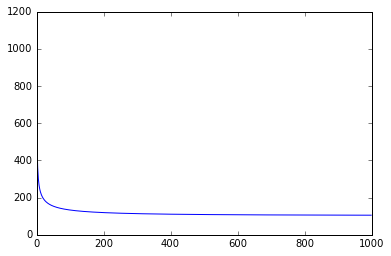

In [129]:
plt.plot(ppn.cost_)
plt.show()

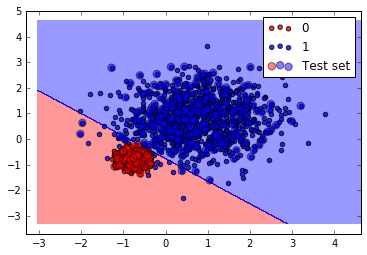

In [130]:
plot_decision_regions(X, y, ppn, test_idx)

### Logistic regression for classification (from sklearn)

In [146]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [147]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [148]:
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

0.892
0.84


In [149]:
print(clf.intercept_, clf.coef_)

[-0.02253485] [[ 1.08398544 -2.88793953]]


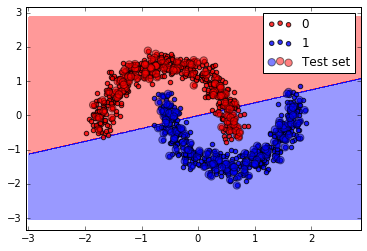

In [150]:
plot_decision_regions(X, y, clf, test_idx)